# Intro to statistical data visualization
The beginning of any data analysis begins with visualizing data. As we mentioned before, it's crucial to visualize the data in as "raw" of a form as possible, to make sure that you're on stable footing when cleaning, etc.

Here, we'll focus instead on visualizing data with the goal of gaining intuitions about the **relationships** of the variables / features at play.

## Packages we'll use
The two most common packages for data visualization in python are:

* Matplotlib - which defines the low-level plotting functions that do most of the actual viz
* Seaborn - which is a higher-level library that easily produces statistical visualizations of data.

# Read in the data
In an earlier notebook, we grabbed some new data from the web about many countries. We'll load both datasets here, and will merge them into a single, tidy dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interact, IntSlider
%matplotlib inline

In [2]:
gapminder_data = pd.read_csv('../projects/gapminder/data/02_cleaned/gapminder_clean.csv')
new_data = pd.read_csv('../projects/gapminder/data/02_cleaned/country_data_clean.csv')

Because we have a "country" column in both datasets, and because they're both in a "tidy" format, it's quite easy to join them together.

In [4]:
# gapminder_data.head()
new_data.head()

,country,murder_rate,murder_rate_updated,description
0,brazil,40974.0,2010,federal republic
1,india,40752.0,2009,federal republic
2,mexico,25757.0,2010,federal republic
3,ethiopia,20239.0,2008,federal republic
4,indonesia,18963.0,2008,republic


In [5]:
data = pd.merge(new_data, gapminder_data, on='country')
data.head()

,country,murder_rate,murder_rate_updated,description,year,pop,life_exp,gdppercap,continent
0,brazil,40974.0,2010,federal republic,1952,56602560,50.917,2108.944355,americas
1,brazil,40974.0,2010,federal republic,1957,65551171,53.285,2487.365989,americas
2,brazil,40974.0,2010,federal republic,1962,76039390,55.665,3336.585802,americas
3,brazil,40974.0,2010,federal republic,1967,88049823,57.632,3429.864357,americas
4,brazil,40974.0,2010,federal republic,1972,100840058,59.504,4985.711467,americas


# A quick aside on the matplotlib plotting API

Matplotlib is an incredibly powerful, but occasionally frustrating package to use. It's API (meaning the ways in which we use functions etc with the package) can be convoluted.

There are two main ways to create plots in matplotlib. The first is a more "matlab" kind of experience:

## The matlab-style interface

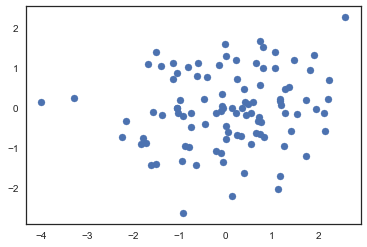

In [6]:
tmp_data = np.random.randn(2, 100)
plt.scatter(*tmp_data)

## The object-oriented interface
A more powerful and preferred method uses an "object-oriented" interface.

This means that, rather than calling a plotting function directly from matplotlib, we first generate an **axis** on which we will plot:

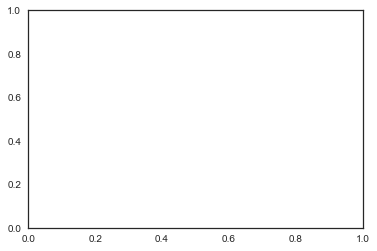

In [7]:
fig, ax = plt.subplots()

Now, we can call plotting methods with this axis directly. This is useful for many reasons that will be come apparent over time.

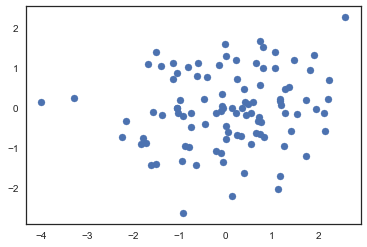

In [9]:
fig, ax = plt.subplots()
ax.scatter(*tmp_data)

# Some background on this data

We never really explained what exactly the gapminder dataset is meant to represent. Below we'll recreate the original visualization using matplotlib. For reference, [here is the original visualization](https://www.gapminder.org/tools/#_locale_id=en;&chart-type=bubbles).

In [11]:
cmap = plt.cm.rainbow
years = np.sort(np.unique(data['year']))
scaler = MinMaxScaler().fit(data[['pop']])

# Create a color for each country ID
country_id = data['country'].unique()
country_id_colors = pd.Series({cid: cmap(ii / len(country_id))
                               for ii, cid in enumerate(country_id)}, name='color')
country_id_colors.index.name = 'country'
country_id_colors = country_id_colors.reset_index()

# Define a function that makes our plot
def plot_timepoint(year):
    fig, ax = plt.subplots(subplot_kw={'xscale': 'log'})
    thisdata = data.query('year == @year')
    thisdata = pd.merge(country_id_colors, thisdata, on='country')
    pop = scaler.transform(thisdata[['pop']])[:, 0]
    pop += .01
    pop *= 1000
    ax.scatter('gdppercap', 'life_exp', s=pop, c='color', data=thisdata, cmap='viridis')
    ax.set(xlim=[100, 1000000], ylim=[0, 90], xlabel='gdppercap',
           ylabel='life_exp', title='Size = Population\nYear: {}'.format(year))
    plt.show()

In [12]:
interact(plot_timepoint, year=IntSlider(years.min(), years.min(), years.max(), 5));

# Common data visualizations
The goal of visualization is about conveying information with visual properties. How we do this can have a huge effect on the way that other people interpret our work. This section will cover a few common ways to visualize data using common packages in python.

## Summarizing data
The first step in understanding your data comes in visualizing its distribution. Take, for example, the bar plot below:

In [14]:
# Pull only data corresponding to the american continent
data_americas = data.query('continent == "americas"')
data_americas

,country,murder_rate,murder_rate_updated,description,year,pop,life_exp,gdppercap,continent
0,brazil,40974.0,2010,federal republic,1952,56602560,50.917,2108.944355,americas
1,brazil,40974.0,2010,federal republic,1957,65551171,53.285,2487.365989,americas
2,brazil,40974.0,2010,federal republic,1962,76039390,55.665,3336.585802,americas
3,brazil,40974.0,2010,federal republic,1967,88049823,57.632,3429.864357,americas
4,brazil,40974.0,2010,federal republic,1972,100840058,59.504,4985.711467,americas
5,brazil,40974.0,2010,federal republic,1977,114313951,61.489,6660.118654,americas
6,brazil,40974.0,2010,federal republic,1982,128962939,63.336,7030.835878,americas
7,brazil,40974.0,2010,federal republic,1987,142938076,65.205,7807.095818,americas
8,brazil,40974.0,2010,federal republic,1992,155975974,67.057,6950.283021,americas
9,brazil,40974.0,2010,federal republic,1997,168546719,69.388,7957.980824,americas


Text(0,0.5,'gdppercap')

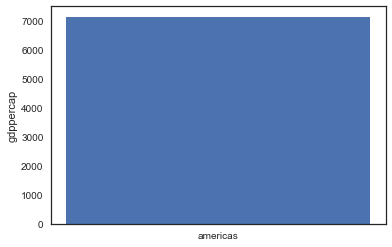

In [15]:
# Now plot the data!
fig, ax = plt.subplots()
ax.bar(data_americas['continent'], data_americas['gdppercap'].mean(), data=data_americas)
ax.set_ylabel('gdppercap')

This is quite possibly the most boring plot you could make. It's using a ton of space to convey one very simple thing: the mean of the distribution.

## Rule 1: Minimize the "Ink to Information" ratio
A good rule of thumb to follow is the "ink to information" ratio. That is - how much information is being conveyed vs. how much ink are you drawing on the page. As a general rule, you want *lots of information* and *little ink*.

We can add a lot more information to this plot by adding a single line:

Text(0,0.5,'gdppercap')

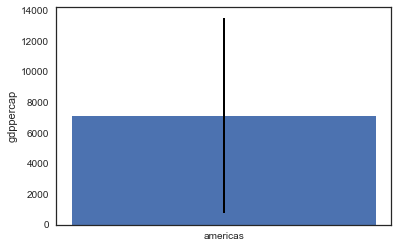

In [16]:
# Calculate standard deviation
std_americas = data_americas.std()

fig, ax = plt.subplots()
ax.bar(data_americas['continent'], data_americas['gdppercap'].mean(), data=data_americas,
        yerr=std_americas['gdppercap'])
ax.set_ylabel('gdppercap')

Now we've got both the mean and the standard deviation of this data, but we've still got a pretty poor information transfer here.

## Rule 2: Show as much of the raw data as possible

As a general rule, you should try to get as close to visualizing raw data as possible (this is true both for yourself, and for your eventual figures). For this simple case, a histogram is a better description:

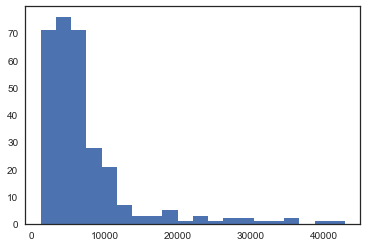

In [17]:
fig, ax = plt.subplots()
ax.hist(data_americas['gdppercap'], bins=20);

Already we've learned quite a bit: namely that we should *not* be relying on the mean of this distribution. It's got a heavy tail to the right, which means the mean will be skewed.

### Fancier distribution viz
Seaborn gives us a really quick way of visualizing distributions in many forms, here are a few:

/Users/choldgraf/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


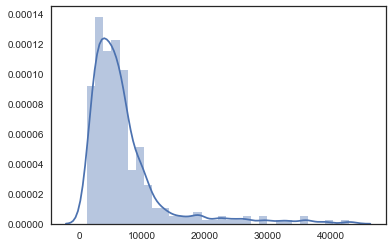

In [18]:
# Take a look at the keyword options for some other cool choices
sns.distplot(data_americas['gdppercap'].values)

You can even visualize the raw values themselves with the `rug` parameter:

/Users/choldgraf/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


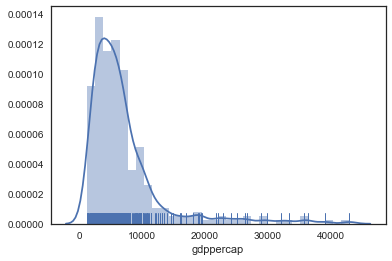

In [19]:
sns.distplot(data_americas['gdppercap'], rug=True)

Note that in this case, we probably want to take the log of the distribution. This tends to make things more symmetric and normally-distributed. Any time you see a distribution that's skewed like this, see how it looks after a log transform.

/Users/choldgraf/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


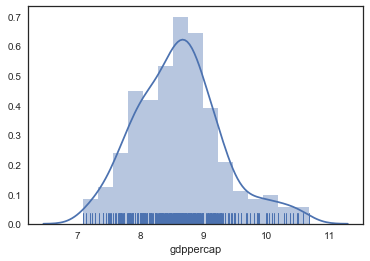

In [20]:
sns.distplot(np.log(data_americas['gdppercap']), rug=True)

# Comparing two variables
Ultimately, we want to make comparisons between variables in our data. The most straightforward version of this is when we have two variables: a continuous value that we measure, and a "group" for each value.

Now that we've got multiple groups, we can begin to think about making comparisons betwene them.

## Rule 3: Visualize numbers that are tied to statistics
When visualizing data for the purpose of making comparisons etc, it's important to choose visuals that map onto the intuitive comparisons people will make.

For example, let's look at this barchart:

<Container object of 5 artists>

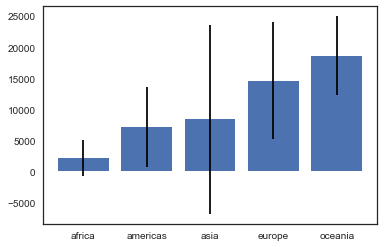

In [21]:
# Calculate the mean / std of each group
continent_means = data.groupby('continent').mean().reset_index()
continent_std = data.groupby('continent').std().reset_index()

# Now plot them
fig, ax = plt.subplots()
ax.bar('continent', 'gdppercap', data=continent_means, yerr=continent_std['gdppercap'])

This barplot tells us two things:

1. What is the mean of each category.
2. What is the variability of each category.

## For example: standard deviation vs. standard error
Note that we say "variability" because this is not always standard across fields. In this case, we're looking at the **standard deviation** of the data above. This has some benefits, and some drawbacks. For example, here's the equation for standard deviation:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/32e3c0f27c2595926963cc5d8df113e6a12cf917" />

 A benefit of this is that it won't change when we collect more data. The term above will scale higher along with the term below. However, *it has no statistical meaning*. It is simply a way of describing variability in the data.

### Standard Error of the Mean
The simplest question we might ask about a distribution: "Is the mean of this distribution different from 0?". In order to accomplish this, we need to know about our uncertainty not only of the data itself, but of the **mean** of that data. AKA, we need to know:

**Standard Error of the Mean** (SEM)

Here's the equation for the SEM:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/55b8c9876e69ce18776b22017c777aca0cb99f29" />

It's simply the standard deviation of a sample divided by a reflection of the total size of that sample.

> How will this value change if we collect a larger sample size?

Let's see what standard error looks like in our plot above:

[Text(0,0.5,'standard error')]

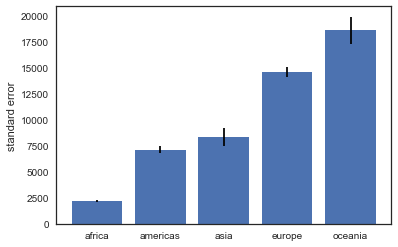

In [22]:
# Calculate the standard error
continent_counts = data.groupby('continent').count()['gdppercap']
continent_ste = continent_std.set_index('continent')['gdppercap'] / np.sqrt(continent_counts)

# Now plot
fig, ax = plt.subplots()
ax.bar('continent', 'gdppercap', data=continent_means, yerr=continent_ste)
ax.set(ylabel='standard error')

> Note that oceania had a larger standard deviation, but a smaller standard error. Also note that Africa's error bar is now really, really tiny. Why?

[Text(0,0.5,'counts')]

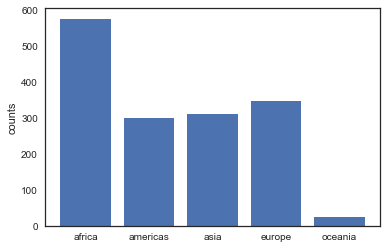

In [23]:
# Look at the count of each continent
fig, ax = plt.subplots()
ax.bar('continent', 'gdppercap', data=continent_counts.reset_index())
ax.set(ylabel='counts')

**SIDENOTE:** Remember what kind of statistical comparison you're making. Even though we're visualizing the standard error of the means above, we can't really make obvious statments **between** these groups. We are merely showing the variability of each group.

## Rule 4: When comparing many groups, boxplots are better than bar plots

This is because a boxplot is a good way to describe the distribution of each group in a succinct manner. They tell us 4 important things:

1. The interquartile range of the boxplot (bottom / top of the box). This means data between the 25th and 75th percentile of the distribution
1. The Median of the group (middle horizontal line). This is also the 50th percentile of the distribution.
1. The extent of the full distribution of data (the lines at the bottom / top)
1. Any outliers in this distribution (seen as points above / below).

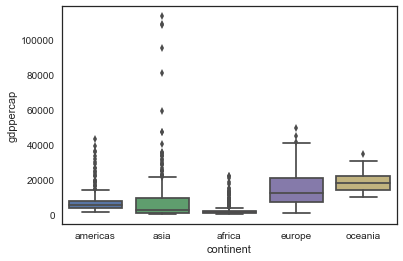

In [24]:
sns.boxplot('continent', 'gdppercap', data=data)

Another option is to use violinplots, which actually show the distribution of each group but provides less information about the statistics of the groups. This can be useful if you want to determine whether groups have the same general shapes (e.g. normally distributed).

[(-15897.875905435256, 50000)]

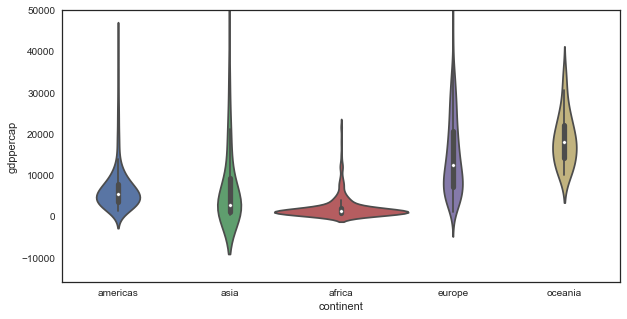

In [25]:
# Make a violin plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot('continent', 'gdppercap', data=data, width=1.2)
ax.set(ylim=[None, 50000])

## Comparing continuous features
Another common comparison is two sets of continuous features. These might be visualized in many different ways, depending on what assumptions we're making about this data.

The simplest way to compare two continuous variables is with a scatterplot

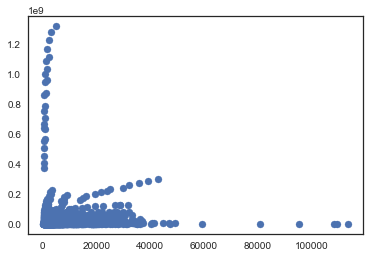

In [26]:
fig, ax = plt.subplots()
ax.scatter('gdppercap', 'pop', data=data)

## Rule 5: Symmetric distributions are happy distributions (aka, logarithms are super useful)

As you can see above, it's really hard to determine what kind of relationship exists between these variables. This is because of the scale along each axis. Some points are many orders of magnitude higher than others.

Let's make this apparent by visualizing the distribution of each variable along with the scatter plot. For this, we'll use the `jointplot` function in seaborn.

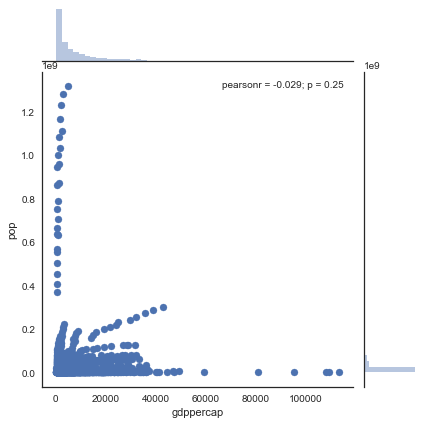

In [27]:
# Visualize the distribution of each axis
sns.jointplot('gdppercap', 'pop', data=data)

As we can see, there are highly-skewed distributions on each axis. To get around this, we can plot this data on a log-scale.

In [28]:
# Create log-scale variables
data['logpop'] = np.log(data['pop'])
data['loggdppercap'] = np.log(data['gdppercap'])

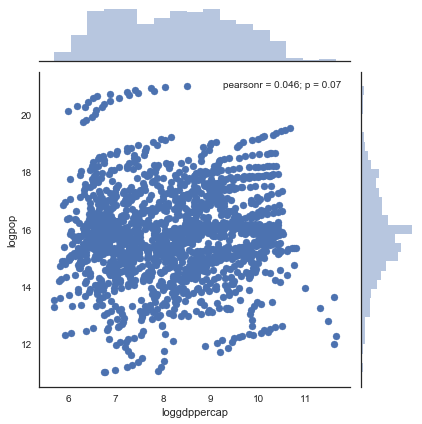

In [29]:
sns.jointplot('loggdppercap', 'logpop', data=data)

## Rule 6: Think about independence in your data

You might notice that a lot of these datapoints seem to be related to one another. We actually know that this is the case because we know this data is country data collected over time.

Most of the statistics we calculate by default **assume that every datapoint is independent of one another**. This means that if we include datapoints that have lots of correlations with one another, we'll bias our statistics. How can we visualize this?

Let's try adding some color to the plot above:

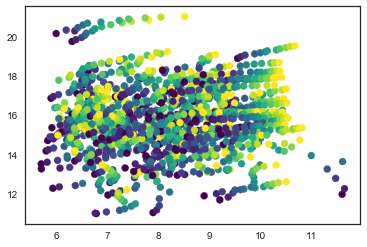

In [30]:
fig, ax = plt.subplots()
ax.scatter('loggdppercap', 'logpop', data=data, c=data['year'].values, cmap=plt.cm.viridis) 

As you can see, there are "streaks" of points in the plot above, reflecting the fact that each country's data is correlated with itself in time.

A better way to visualize this is with a **correlation matrix**.

We'll construct this with something called a "pivot table"

In [32]:
# Createa a pivot table of our data
data_by_year = data.pivot('country', 'year', 'gdppercap')
data_by_year

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338
albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,5288.040382,6223.367465
angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,2773.287312,4797.231267
argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
australia,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440
austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
bahrain,9867.084765,11635.799450,12753.275140,14804.672700,18268.658390,19340.101960,19211.147310,18524.024060,19035.579170,20292.016790,23403.559270,29796.048340
bangladesh,684.244172,661.637458,686.341554,721.186086,630.233627,659.877232,676.981866,751.979403,837.810164,972.770035,1136.390430,1391.253792


In [33]:
# Now generate a correlation matrix w/ this table
corr_matrix = data_by_year.corr()
corr_matrix

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
year,,,,,,,,,,,,
1952,1.000000,0.998360,0.983159,0.928838,0.939114,0.731126,0.509843,0.465747,0.501726,0.506404,0.440833,0.479952
1957,0.998360,1.000000,0.990814,0.944046,0.952739,0.760227,0.548029,0.503413,0.535656,0.538008,0.473216,0.511079
1962,0.983159,0.990814,1.000000,0.977612,0.980967,0.835094,0.649949,0.605555,0.630074,0.627905,0.567242,0.600222
1967,0.928838,0.944046,0.977612,1.000000,0.994700,0.919210,0.772027,0.723122,0.736551,0.726936,0.672295,0.699010
1972,0.939114,0.952739,0.980967,0.994700,1.000000,0.912236,0.755872,0.703836,0.724367,0.714888,0.656520,0.685943
1977,0.731126,0.760227,0.835094,0.919210,0.912236,1.000000,0.946291,0.893359,0.890186,0.867728,0.826357,0.837988
1982,0.509843,0.548029,0.649949,0.772027,0.755872,0.946291,1.000000,0.976122,0.955213,0.930587,0.912466,0.910384
1987,0.465747,0.503413,0.605555,0.723122,0.703836,0.893359,0.976122,1.000000,0.979835,0.967698,0.959753,0.952338
1992,0.501726,0.535656,0.630074,0.736551,0.724367,0.890186,0.955213,0.979835,1.000000,0.992800,0.979800,0.971330


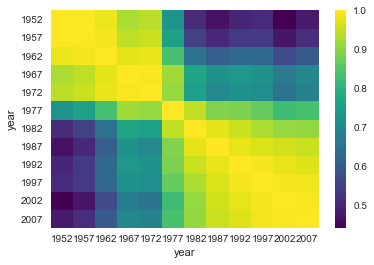

In [34]:
sns.heatmap(corr_matrix, cmap=plt.cm.viridis)

We can also visualize correlations between different kinds of variables. Because our data is tidy, it's easy to re-pivot and make a different comparison:

In [35]:
data_by_country = data.pivot('year', 'country', 'gdppercap')
data_by_country

country,afghanistan,albania,algeria,angola,argentina,australia,austria,bahrain,bangladesh,belgium,...,tunisia,turkey,uganda,united kingdom,united states,uruguay,venezuela,vietnam,zambia,zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,8343.105127,...,1468.475631,1969.100980,734.753484,9979.508487,13990.48208,5716.766744,7689.799761,605.066492,1147.388831,406.884115
1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,9714.960623,...,1395.232468,2218.754257,774.371069,11283.177950,14847.12712,6150.772969,9802.466526,676.285448,1311.956766,518.764268
1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,10991.206760,...,1660.303210,2322.869908,767.271740,12477.177070,16173.14586,5603.357717,8422.974165,772.049160,1452.725766,527.272182
1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,13149.041190,...,1932.360167,2826.356387,908.918522,14142.850890,19530.36557,5444.619620,9541.474188,637.123289,1777.077318,569.795071
1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,16672.143560,...,2753.285994,3450.696380,950.735869,15895.116410,21806.03594,5703.408898,10505.259660,699.501644,1773.498265,799.362176
1977,786.113360,3533.003910,4910.416756,3008.647355,10079.026740,18334.19751,19749.422300,19340.101960,659.877232,19117.974480,...,3120.876811,4269.122326,843.733137,17428.748460,24072.63213,6504.339663,13143.950950,713.537120,1588.688299,685.587682
1982,978.011439,3630.880722,5745.160213,2756.953672,8997.897412,19477.00928,21597.083620,19211.147310,676.981866,20979.845890,...,3560.233174,4241.356344,682.266227,18232.424520,25009.55914,6920.223051,11152.410110,707.235786,1408.678565,788.855041
1987,852.395945,3738.932735,5681.358539,2430.208311,9139.671389,21888.88903,23687.826070,18524.024060,751.979403,22525.563080,...,3810.419296,5089.043686,617.724406,21664.787670,29884.35041,7452.398969,9883.584648,820.799445,1213.315116,706.157306
1992,649.341395,2497.437901,5023.216647,2627.845685,9308.418710,23424.76683,27042.018680,19035.579170,837.810164,25575.570690,...,4332.720164,5678.348271,644.170797,22705.092540,32003.93224,8137.004775,10733.926310,989.023149,1210.884633,693.420786


We'll visualize this correlation matrix again. This time it'll be a little more complex:

**Note:** You should always show symmetric colormaps with bi-directions axes

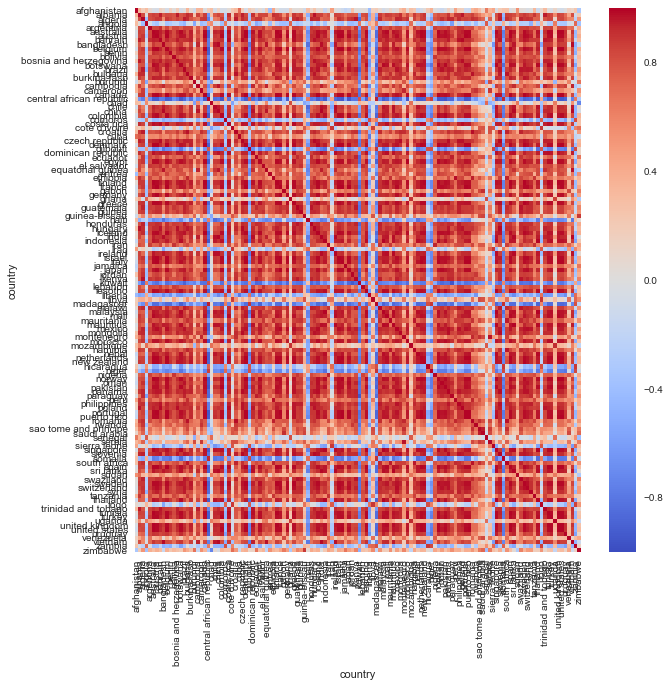

In [36]:
corr_matrix = data_by_country.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap=plt.cm.coolwarm)

Seaborn also has a useful function that attempts to sort and cluster this heatmap:

/Users/choldgraf/Dropbox/github/forks/python/matplotlib/lib/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


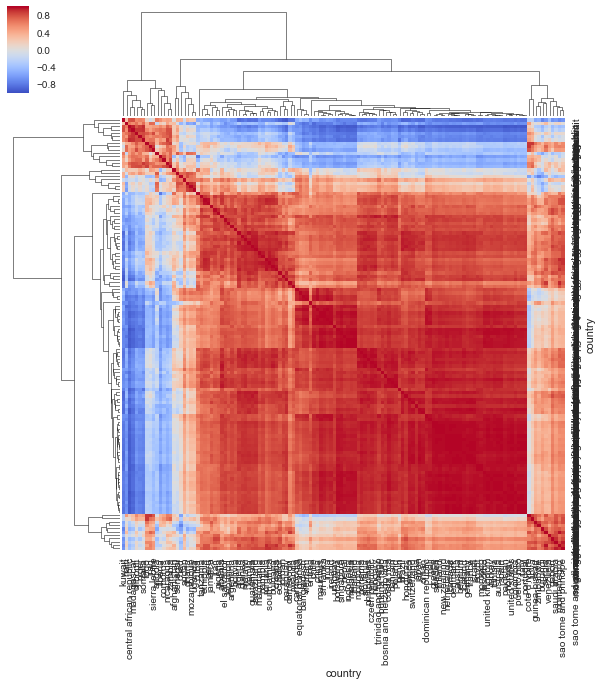

In [37]:
sns.clustermap(corr_matrix, cmap=plt.cm.coolwarm)

## Visualizing multiple factors

Often, the goal of our visualization is to show off multiple levels, or groups, in our data. We then compare them on some quantitative measure. To visualize this, a **factorplot** is very useful.

Let's split up our data by the type of government. To keep things manageable we'll only keep the top 5 most common types.

In [40]:
data_gov_types

,country,murder_rate,murder_rate_updated,description,year,pop,life_exp,gdppercap,continent,logpop,loggdppercap
0,brazil,40974.0,2010,federal republic,1952,56602560,50.917,2108.944355,americas,17.851565,7.653943
1,brazil,40974.0,2010,federal republic,1957,65551171,53.285,2487.365989,americas,17.998342,7.818980
2,brazil,40974.0,2010,federal republic,1962,76039390,55.665,3336.585802,americas,18.146762,8.112703
3,brazil,40974.0,2010,federal republic,1967,88049823,57.632,3429.864357,americas,18.293413,8.140276
4,brazil,40974.0,2010,federal republic,1972,100840058,59.504,4985.711467,americas,18.429046,8.514331
5,brazil,40974.0,2010,federal republic,1977,114313951,61.489,6660.118654,americas,18.554459,8.803893
6,brazil,40974.0,2010,federal republic,1982,128962939,63.336,7030.835878,americas,18.675036,8.858061
7,brazil,40974.0,2010,federal republic,1987,142938076,65.205,7807.095818,americas,18.777922,8.962788
8,brazil,40974.0,2010,federal republic,1992,155975974,67.057,6950.283021,americas,18.865213,8.846538
9,brazil,40974.0,2010,federal republic,1997,168546719,69.388,7957.980824,americas,18.942724,8.981931


In [38]:
# Keep the top five government types
keep_descriptions = data['description'].value_counts().index[:5]
data_gov_types = data.query('description in @keep_descriptions')

Now, we can simultaneously split up our data by multiple groups at once!

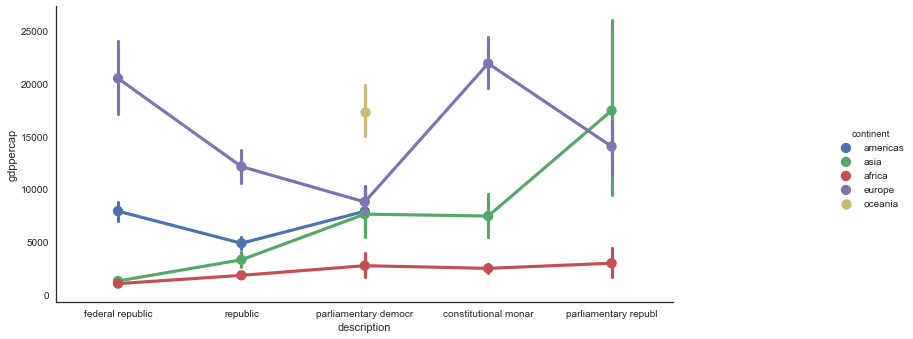

In [41]:
grid = sns.factorplot('description', 'gdppercap',
                      hue='continent', data=data_gov_types)
grid.fig.set_size_inches(15, 5)

## Visualizing many pairwise relationships at once

While a factorplot works if you have multiple categorical variables, it's not useful if you have lots of continuous variables.

Another options is to view many pairwise relationships at once. With `seaborn`, it's easy to visualize a scatterplot of each variable, along with the histogram of that variable's values.

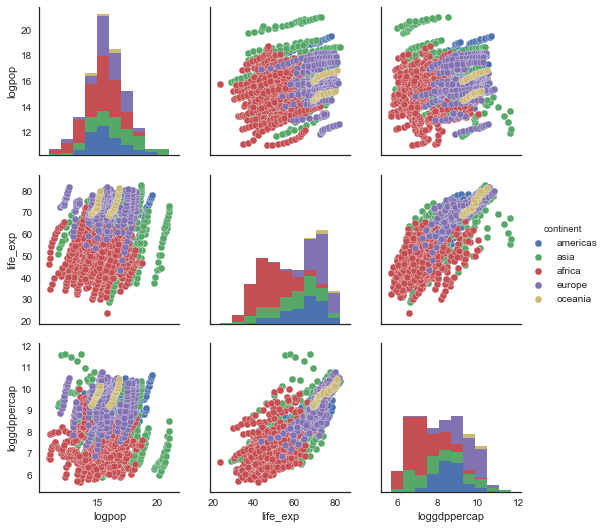

In [42]:
sns.pairplot(data, hue='continent',
             vars=['logpop', 'life_exp', 'loggdppercap'])